   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002                0   
1  R003  05-01-11  04:00:00   4388333  2911002                0   
2  R003  05-01-11  12:00:00   4388333  2911002                0   
3  R003  05-01-11  16:00:00   4388333  2911002                0   
4  R003  05-01-11  20:00:00   4388333  2911002                0   

   EXITSn_hourly             datetime  hour  day_week  weekday        station  \
0              0  2011-05-01 00:00:00     0         6        0  CYPRESS HILLS   
1              0  2011-05-01 04:00:00     4         6        0  CYPRESS HILLS   
2              0  2011-05-01 12:00:00    12         6        0  CYPRESS HILLS   
3              0  2011-05-01 16:00:00    16         6        0  CYPRESS HILLS   
4              0  2011-05-01 20:00:00    20         6        0  CYPRESS HILLS   

    latitude  longitude          conds  fog  precipi  pressurei  rain  tempi  \
0  40.689945 -73.872564       

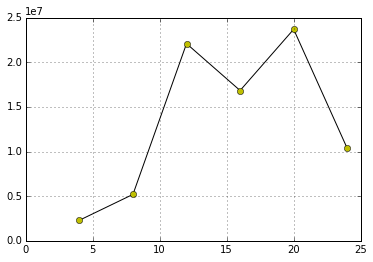

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

weather_data = pd.read_csv('data/weather.csv')
# weather_data.to_csv("output.csv")
#print weather_data.loc[5]

pandas.options.mode.chained_assignment = None
pysqldf = lambda q: sqldf(q, locals())

data = weather_data

print data.head()


q = """
    select DESCn from data limit 3
    """

#print pysqldf(q).head()
entries = []
hours = []

midnight_value = 0
for i in range(24):
    entry_sum = np.sum(data["ENTRIESn_hourly"][data.hour == i])
    if entry_sum > 0:
        
        if i == 0:
            entries.append(entry_sum)
            hours.append(24)
        else:
            entries.insert(i/4-1,entry_sum)
            hours.insert(i/4-1, i)
    i = i + 1;


filtered_dict = {"hour":hours, "entries":entries}

filtered_data = pandas.DataFrame(filtered_dict)
#print filtered_data["hour"].unique()
#print "::::::::::::"
#print data.head()
print filtered_data.head()



plt.plot(filtered_data.hour, filtered_data.entries, 'k', filtered_data.hour, filtered_data.entries, 'yo')
#plt.axis([0, 6, 0, 20])
plt.grid(True)
plt.axis([0, 25, 0, 25000000])
plt.show()
    


In [ ]:
weather_data[weather_data.conds == "Rain"].head()

In [ ]:
import pandasql

q = """
select ENTRIESn, station, conds
from weather_data 
where conds = 'Rain'
limit 900
"""

filtered_data_rain = pandasql.sqldf(q, locals())
filtered_data_rain.head()

data2 = filtered_data_rain[["station","conds"]]
print data2.groupby(["station"]).head()

In [ ]:
import pandasql

q = """
select ENTRIESn, station, conds
from weather_data 
where conds = 'Clear'
limit 900
"""

filtered_data = pandasql.sqldf(q, locals())
filtered_data.describe()
filtered_data.conds.count()

In [ ]:
# for i in range(0, len(df.index) ):
#         if i == 0:
#             df["ENTRIESn_hourly"] = 1
#         else:
#             df["ENTRIESn_hourly"].iloc[i] = df["ENTRIESn"].iloc[i] - df["ENTRIESn"].iloc[i - 1]

In [ ]:
# import sklearn.linear_model

# model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
# model.fit(features, values, sample_weight=None)

# intercept = model.intercept_
# params = model.coef_

# model.predict(X)

In [ ]:
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor

"""
In this question, you need to:
1) Implement the linear_regression() procedure using gradient descent.
   You can use the SGDRegressor class from sklearn, since this class uses gradient descent.
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    
    model = SGDRegressor()
    model.fit(features, values)

    intercept = model.intercept_
    params = model.coef_
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subset (~50%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features or fewer iterations.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    
  
    #datelist = []
    
    #for item in dataframe["DATEn"]:
        #string = item[5:7]
        #number = int(string)
        #datelist.append(number)
    
    #dataframe["current_month"] = datelist
    
    dataframe["DATEn"] = pandas.to_datetime(dataframe["DATEn"])
    dataframe["day_of_week"] = dataframe.DATEn.dt.dayofweek
    
    
    features = dataframe[['rain', 'Hour', 'day_of_week', 'precipi']]
    
    
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    #print dataframe.dtypes
    #print ":::::::::::::::::::"
    #print features.dtypes
    #print ":::::::::::::::::::"
    print dataframe.describe()
    
    return predictions

## TITANIC 79.12%

In [ ]:
import numpy
import pandas
import statsmodels.api as sm

predictions = {}
df = pandas.read_csv(file_path)
for passenger_index, passenger in df.iterrows():
    passenger_id = passenger['PassengerId']

    predictions[passenger_id] = 0

    if passenger['Sex'] == 'female':
        predictions[passenger_id] = 1

    if passenger['Age'] < 18 and passenger["Pclass"] == 1:
        predictions[passenger_id] = 1

        

In [122]:
from urllib import urlopen
import json
import datetime

APIKEY = "4b21eeff0ce3806f5e42d1bad302b81e"
LATITUDE = "44.8"
LONGITUDE = "15.98"
TIME = datetime.datetime(2015,1,1).date()
print TIME
r = urlopen("https://api.forecast.io/forecast/"+APIKEY+"/"+LATITUDE+","+LONGITUDE)


print r.read()

2015-01-01
{"latitude":44.8,"longitude":15.98,"timezone":"Europe/Sarajevo","offset":1,"currently":{"time":1449660298,"summary":"Mostly Cloudy","icon":"partly-cloudy-day","precipIntensity":0,"precipProbability":0,"temperature":34.86,"apparentTemperature":34.86,"dewPoint":29.91,"humidity":0.82,"windSpeed":1.72,"windBearing":35,"cloudCover":0.83,"pressure":1033.16,"ozone":290.33},"hourly":{"summary":"Light snow starting tonight, continuing until tomorrow morning.","icon":"snow","data":[{"time":1449658800,"summary":"Mostly Cloudy","icon":"partly-cloudy-day","precipIntensity":0,"precipProbability":0,"temperature":34.56,"apparentTemperature":34.56,"dewPoint":29.72,"humidity":0.82,"windSpeed":1.68,"windBearing":36,"cloudCover":0.85,"pressure":1033.25,"ozone":290.87},{"time":1449662400,"summary":"Mostly Cloudy","icon":"partly-cloudy-day","precipIntensity":0,"precipProbability":0,"temperature":35.3,"apparentTemperature":35.3,"dewPoint":30.17,"humidity":0.81,"windSpeed":1.79,"windBearing":34,"cl

In [107]:
import datetime
import pandas as pd
import forecastio
import getpass
import 

# Enter your API here
api_key = getpass.getpass()
print len(api_key)

lat = 45.8
lng = 15.98

date = datetime.datetime(2015,1,1)
forecast = forecastio.load_forecast(api_key, lat, lng, time=date, units="us")


hourly = forecast.hourly()
hourly.data

print hourly.data[0].d

ImportError: No module named forecastio